# <center><h2>Primal and Dual representation of a SSP</h2></center>

<img src='image_c'>

# Dual LP Formulation of SSP



In this formulation, shown in (LP 1), the variables are the policy’s occupation measures $x_{s,a}$ and represent the expected number of times action $a ∈ A(s)$ will be executed in state $s$.


\begin{equation*}
\underset{x}{min} \sum_{s\in S,a\in A(s)} x_{s,a}C(a) \quad \text{s.t. (C1) - (C6)}  \tag{LP 1}
\end{equation*}


$$
x_{s,a}\geq 0 \quad \forall s\in S, a \in A(s) \tag{C1}
$$

$$
out(s_0)-in(s_0)=1	\tag{C2}
$$

$$
\sum_{s_g\in G}in(s_g)=1 \tag{C3}
$$

$$
out(s)-in(s) = 0 \quad \forall s \in S \setminus (G\cup \{s_0\} ) \tag{C4}
$$

$$
in(s) = \sum_{s'\in S, a \in App(s')}x_{s',a}P(s,|s',a)	\tag{C5}
$$

$$
out(s) = \sum_{a\in App(s)} x_{s,a} \quad \forall s\in S\setminus G \tag{C6}
$$

# Example

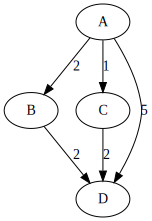

In [30]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo

SVG(filename='example.svg')


<p><strong>STEP 1:</strong> Define the optimization parameter (this case we want to minimize the cost). For this we use LpMinimize.</p>

In [31]:
from pulp import *

SSP = LpProblem("SSP01", LpMinimize)

<hr>
<p><strong>STEP 2:</strong> Declaring variables, the first parameter of LpVariable define a lower value of it. We set it as 0 to follow (C1)

Occupation measure variables

In [32]:
Aa1 = LpVariable("Aa1",0)
Aa2 = LpVariable("Aa2",0)
Bb1 = LpVariable("Bb1",0)
Cc1 = LpVariable("Cc1",0)

Out fluent variables

In [33]:
OUT_A = LpVariable("OUT_A",0)
OUT_B = LpVariable("OUT_B",0)
OUT_C = LpVariable("OUT_C",0)
OUT_D = LpVariable("OUT_D",0)

In fluent variables

In [34]:
IN_A = LpVariable("IN_A",0)
IN_B = LpVariable("IN_B",0)
IN_C = LpVariable("IN_C",0)
IN_D = LpVariable("IN_D",0)

<hr>
<p><strong>STEP 3:</strong> Define the objective function. Coeficients represent the immediate cost of an action.

In [35]:
SSP += Aa1*10 + Aa2*1 + Bb1*1 + Cc1*1

<hr>
<p><strong>STEP 4:</strong> Add the constraints.

C1: Added in STEP 2 - Occupation measure variales


$$
x_{s,a}\geq 0 \quad \forall s\in S, a \in App(s) \tag{C1}
$$



C2: Define the source state $s$.
$$
out(s_0)-in(s_0)=1	\tag{C2}
$$

In [36]:
SSP += OUT_A - IN_A == 1

C3: Define the sink
$$
\sum_{s_g\in G}in(s_g)=1 \tag{C3}
$$


In [37]:
SSP += IN_D == 1

C4: Define the flow conservation principle, i.e., the flow reaching $s$ must leave $s$.

$$
out(s)-in(s) = 0 \quad \forall s \in S \setminus (G\cup \{s_0\} ) \tag{C4}
$$

In [38]:
SSP += OUT_B - IN_B == 0
SSP += OUT_C - IN_C == 0

C5: Define the expected flow entering of a state $s$. In this example all transition are deterministics (P)

$$
in(s) = \sum_{s'\in S, a \in App(s')}x_{s',a}P(s,|s',a)	\tag{C5}
$$

In [39]:
SSP += IN_B == Aa1
SSP += IN_C == Aa2*0.3
SSP += IN_D == Bb1 + Aa2*0.7 + Cc1

C6: Define the expected flow leaving of a state $s$.

$$
out(s) = \sum_{a\in App(s)} x_{s,a} \quad \forall s\in S\setminus G \tag{C6}
$$

In [40]:
SSP += OUT_A == Aa1 + Aa2 
SSP += OUT_B == Bb1
SSP += OUT_C == Cc1


<hr>
<p><strong>STEP 5:</strong> Call a LP Solver and print the solution

In [41]:
GLPK().solve(SSP)

# Solution
for v in SSP.variables():
	print(v.name, "=", v.varValue)

print("objective=", value(SSP.objective))

Aa1 = 0.0
Aa2 = 1.0
Bb1 = 0.0
Cc1 = 0.3
IN_A = 0.0
IN_B = 0.0
IN_C = 0.3
IN_D = 1.0
OUT_A = 1.0
OUT_B = 0.0
OUT_C = 0.3
objective= 1.3


# Running full code

In [15]:
from pulp import *

SSP = LpProblem("SSP01", LpMinimize)


#declare variables

Aa1 = LpVariable("Aa1",0)
Aa2 = LpVariable("Aa2",0)
Aa3 = LpVariable("Aa3",0)
Bb1 = LpVariable("Bb1",0)
Cc1 = LpVariable("Cc1",0)

OUT_A = LpVariable("OUT_A",0)
OUT_B = LpVariable("OUT_B",0)
OUT_C = LpVariable("OUT_C",0)
OUT_D = LpVariable("OUT_D",0)

IN_A = LpVariable("IN_A",0)
IN_B = LpVariable("IN_B",0)
IN_C = LpVariable("IN_C",0)
IN_D = LpVariable("IN_D",0)


#Objective

SSP += Aa1*2 + Aa2*1 + Aa3*5 + Bb1*2 + Cc1*2


#Constraints

#C1 - Done

#C2

SSP += OUT_A - IN_A == 1

#C3

SSP += IN_D == 1

#C4

SSP += OUT_B - IN_B == 0
SSP += OUT_C - IN_C == 0

#C5

SSP += IN_B == Aa1
SSP += IN_C == Aa2
SSP += IN_D == Bb1 + Aa3 + Cc1

#C6

SSP += OUT_A == Aa1 + Aa2 + Aa3
SSP += OUT_B == Bb1
SSP += OUT_C == Cc1


GLPK().solve(SSP)

# Solution
for v in SSP.variables():
	print(v.name, "=", v.varValue)

print("objective=", value(SSP.objective))

Aa1 = 0.0
Aa2 = 1.0
Aa3 = 0.0
Bb1 = 0.0
Cc1 = 1.0
IN_A = 0.0
IN_B = 0.0
IN_C = 1.0
IN_D = 1.0
OUT_A = 1.0
OUT_B = 0.0
OUT_C = 1.0
objective= 3.0


<hr>
# Dual LP Formulation for SSPUDE

This formulation allows solve problems with unavoidable dead-ends

$$
\underset{x}{min} \sum_{s\in S,a\in A(s)} x_{s,a}C(s,a) \quad \text{s.t. (C1) - (C6)} \tag{LP 1 modified}
$$

$$
x_{s,a}\geq 0 \quad \forall s\in S, a \in A(s) \tag{C1}
$$


$$
in(s) = \sum_{s'\in S, a \in App(s')}x_{s',a}P(s,|s',a)	\tag{C2}
$$

$$
out(s) = \sum_{a\in App(s)} x_{s,a} \quad \forall s\in S \tag{C3}
$$


$$
out(s)-in(s) \leq 0 \quad \forall s \in S \setminus (G\cup \{s_0\} ) \tag{C4 modified}
$$

$$
out(s_0)-in(s_0) \leq 1	\tag{C5}
$$

$$
\sum_{s_g\in G} in(s_g) = p^{max}\tag{C6 modified}
$$

# Example

<img src='mcmp.png'>

# Code

In [12]:
from pulp import *

SSP = LpProblem("SSPUDE", LpMinimize)


#declare variables

S0a0 = LpVariable("S0a0", 0)
S0a1 = LpVariable("S0a1", 0)
S1a0 = LpVariable("S1a0", 0)
S2a1 = LpVariable("S2a1", 0)
D2a1 = LpVariable("D2a1", 0)
D3a1 = LpVariable("D3a1", 0)

OUT_S0 = LpVariable("OUT_S0",0)
OUT_S1 = LpVariable("OUT_S1",0)
OUT_S2 = LpVariable("OUT_S2",0)
OUT_Sg = LpVariable("OUT_Sg",0)
OUT_D1 = LpVariable("OUT_D1",0)
OUT_D2 = LpVariable("OUT_D2",0)
OUT_D3 = LpVariable("OUT_D3",0)

IN_S0 = LpVariable("IN_S0",0)
IN_S1 = LpVariable("IN_S1",0)
IN_S2 = LpVariable("IN_S2",0)
IN_Sg = LpVariable("IN_Sg",0)
IN_D1 = LpVariable("IN_D1",0)
IN_D2 = LpVariable("IN_D2",0)
IN_D3 = LpVariable("IN_D3",0)

#Objective

SSP += S0a0 + S0a1+ S1a0*3 + S2a1*2

#COnstraints

#C1
#C2

SSP += IN_S0 == S2a1*0.25 + S1a0*0.5
SSP += IN_S1 == S0a0*0.5
SSP += IN_S2 == S0a1
SSP += IN_Sg == S1a0*0.5 + S2a1*0.25
SSP += IN_D1 == S0a0*0.5
SSP += IN_D2 == S2a1*0.5 + D3a1
SSP += IN_D3 == D2a1

#C3

SSP += OUT_S0 == S0a0 + S0a1 
SSP += OUT_S1 == S1a0  
SSP += OUT_S2 == S2a1
SSP += OUT_D2 == D2a1 
SSP += OUT_D3 == D3a1

#C4

#SSP += OUT_S0 - IN_S0 <= 0
SSP += OUT_S1 - IN_S1 <= 0
SSP += OUT_S2 - IN_S2 <= 0 
#SSP += OUT_Sg - IN_Sg <= 0
SSP += OUT_D1 - IN_D1 <= 0
SSP += OUT_D2 - IN_D2 <= 0
SSP += OUT_D3 - IN_D3 <= 0

#C5

SSP += OUT_S0 - IN_S0 <= 1

#C6 
SSP += IN_Sg == 0.33


GLPK().solve(SSP)

# Solution
for v in SSP.variables():
	print(v.name, "=", v.varValue)

    
print("Objective =", value(SSP.objective) )

print(SSP)




D2a1 = 0.0
D3a1 = 0.0
IN_D1 = 0.66
IN_D2 = 0.0
IN_D3 = 0.0
IN_S0 = 0.33
IN_S1 = 0.66
IN_S2 = 0.0
IN_Sg = 0.33
OUT_D1 = 0.0
OUT_D2 = 0.0
OUT_D3 = 0.0
OUT_S0 = 1.32
OUT_S1 = 0.66
OUT_S2 = 0.0
S0a0 = 1.32
S0a1 = 0.0
S1a0 = 0.66
S2a1 = 0.0
Objective = 3.3
SSPUDE:
MINIMIZE
1*S0a0 + 1*S0a1 + 3*S1a0 + 2*S2a1 + 0
SUBJECT TO
_C1: IN_S0 - 0.5 S1a0 - 0.25 S2a1 = 0

_C2: IN_S1 - 0.5 S0a0 = 0

_C3: IN_S2 - S0a1 = 0

_C4: IN_Sg - 0.5 S1a0 - 0.25 S2a1 = 0

_C5: IN_D1 - 0.5 S0a0 = 0

_C6: - D3a1 + IN_D2 - 0.5 S2a1 = 0

_C7: - D2a1 + IN_D3 = 0

_C8: OUT_S0 - S0a0 - S0a1 = 0

_C9: OUT_S1 - S1a0 = 0

_C10: OUT_S2 - S2a1 = 0

_C11: - D2a1 + OUT_D2 = 0

_C12: - D3a1 + OUT_D3 = 0

_C13: - IN_S1 + OUT_S1 <= 0

_C14: - IN_S2 + OUT_S2 <= 0

_C15: - IN_D1 + OUT_D1 <= 0

_C16: - IN_D2 + OUT_D2 <= 0

_C17: - IN_D3 + OUT_D3 <= 0

_C18: - IN_S0 + OUT_S0 <= 1

_C19: IN_Sg = 0.33

VARIABLES
D2a1 Continuous
D3a1 Continuous
IN_D1 Continuous
IN_D2 Continuous
IN_D3 Continuous
IN_S0 Continuous
IN_S1 Continuous
IN_S2 Conti

    <img src='mcmp.png'>

# How to calculate $p^{max}$?

$$
max \sum in(s_g) \quad \text{s.t. (C1) - (C3), (C7) - (C8)} \tag{LP 2}
$$

$$
out(s)-in(s) = 0 \quad \forall s \in S \setminus (G\cup \{s_0\} ) \tag{C7}
$$

$$
out(s_0)-in(s_0) = 1 \tag{C8}
$$

# Code

In [1]:
from pulp import *

SSP = LpProblem("SSP01", LpMaximize)


S0a0 = LpVariable("S0a0", 0)
S0a1 = LpVariable("S0a1", 0)
S1a0 = LpVariable("S1a0", 0)
S2a1 = LpVariable("S2a1", 0)
D2a1 = LpVariable("D2a1", 0)
D3a1 = LpVariable("D3a1", 0)

OUT_S0 = LpVariable("OUT_S0",0)
OUT_S1 = LpVariable("OUT_S1",0)
OUT_S2 = LpVariable("OUT_S2",0)
OUT_Sg = LpVariable("OUT_Sg",0)
OUT_D1 = LpVariable("OUT_D1",0)
OUT_D2 = LpVariable("OUT_D2",0)
OUT_D3 = LpVariable("OUT_D3",0)

IN_S0 = LpVariable("IN_S0",0)
IN_S1 = LpVariable("IN_S1",0)
IN_S2 = LpVariable("IN_S2",0)
IN_Sg = LpVariable("IN_Sg",0)
IN_D1 = LpVariable("IN_D1",0)
IN_D2 = LpVariable("IN_D2",0)
IN_D3 = LpVariable("IN_D3",0)

#Objective

SSP += IN_Sg

#C1
#C2

SSP += IN_S0 == S2a1*0.25 + S1a0*0.5
SSP += IN_S1 == S0a0*0.5
SSP += IN_S2 == S0a1
SSP += IN_Sg == S1a0*0.5 + S2a1*0.25
SSP += IN_D1 == S0a0*0.5
SSP += IN_D2 == S2a1*0.5 + D3a1
SSP += IN_D3 == D2a1

#C3

SSP += OUT_S0 == S0a0 + S0a1 
SSP += OUT_S1 == S1a0  
SSP += OUT_S2 == S2a1
SSP += OUT_D2 == D2a1 
SSP += OUT_D3 == D3a1

#C7
#SSP += OUT_S0 - IN_S0 == 0
SSP += OUT_S1 - IN_S1 == 0
SSP += OUT_S2 - IN_S2 == 0 
#SSP += OUT_Sg - IN_Sg == 0
SSP += OUT_D1 - IN_D1 == 0
SSP += OUT_D2 - IN_D2 == 0
SSP += OUT_D3 - IN_D3 == 0

#C8

SSP += OUT_S0 - IN_S0 == 1

GLPK().solve(SSP)

# Solution
for v in SSP.variables():
	print(v.name, "=", v.varValue)

print("MaxProb =", value(SSP.objective) )


D2a1 = 0.0
D3a1 = 0.0
IN_D1 = 0.666667
IN_D2 = 0.0
IN_D3 = 0.0
IN_S0 = 0.333333
IN_S1 = 0.666667
IN_S2 = 0.0
IN_Sg = 0.333333
OUT_D1 = 0.666667
OUT_D2 = 0.0
OUT_D3 = 0.0
OUT_S0 = 1.33333
OUT_S1 = 0.666667
OUT_S2 = 0.0
S0a0 = 1.33333
S0a1 = 0.0
S1a0 = 0.666667
S2a1 = 0.0
MaxProb = 0.333333
